<a href="https://colab.research.google.com/github/Loptt/CE888-Course/blob/main/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading data

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b4c0c68d0>,
      dtype=object)

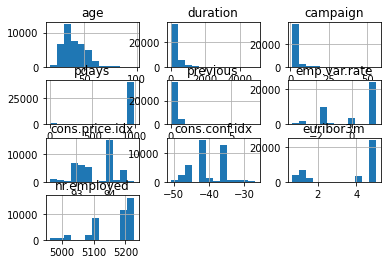

In [67]:
df_num = df[df.select_dtypes([np.int64, np.float64]).columns]
df_num.hist(bins=12)

## Preprocessing Data

First we encode categorical data and transform the target label into numbers.

In [68]:
from sklearn.preprocessing import LabelEncoder

df_label = df['y'].values
df_features = df.drop('y', axis=1)

df_dummies = pd.get_dummies(df_features)

le = LabelEncoder()
df_label_enc = le.fit_transform(df_label)

Drop the duration column.

In [69]:
df_dummies_nodur = df_dummies.drop("duration", axis=1)
df_dummies_nodur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 62 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   job_admin.                     41188 non-null  uint8  
 10  job_blue-collar                41188 non-null  uint8  
 11  job_entrepreneur               41188 non-null  uint8  
 12  job_housemaid                  41188 non-null 

Scaling the features with MinMaxScaler

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_dummies_nodur)
scaled_df = pd.DataFrame(scaler.transform(df_dummies_nodur), columns=df_dummies_nodur.columns)
scaled_df

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.481481,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.493827,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.246914,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.283951,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.481481,0.000000,1.0,0.000000,0.937500,0.698753,0.60251,0.957379,0.859735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41184,0.358025,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41185,0.481481,0.018182,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
41186,0.333333,0.000000,1.0,0.000000,0.479167,1.000000,0.00000,0.089322,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Calculating the imbalance in the label.

Percentage no: 88.73%
Percentage yes: 11.27%



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


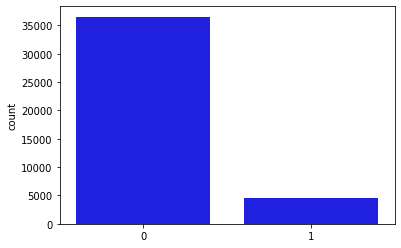

In [70]:
import seaborn as sns

sns.countplot(df_label_enc, color='blue')
print("Percentage no: {:.2f}%".format((len([x for x in df_label_enc if x == 0]) / len(df_label_enc)) * 100))
print("Percentage yes: {:.2f}%\n".format((len([x for x in df_label_enc if x == 1]) / len(df_label_enc)) * 100))

Splitting the data into train and test using a stratified method.

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_df, df_label_enc, test_size=0.2, random_state=50, stratify=df_label)
print("Percentage no in train: {:.2f}%".format((len([x for x in y_train if x == 0]) / len(y_train)) * 100))
print("Percentage yes in train: {:.2f}%\n".format((len([x for x in y_train if x == 1]) / len(y_train)) * 100))
print("Percentage no in test: {:.2f}%".format((len([x for x in y_test if x == 0]) / len(y_test)) * 100))
print("Percentage yes in test: {:.2f}%\n".format((len([x for x in y_test if x == 1]) / len(y_test)) * 100))

Percentage no in train: 88.73%
Percentage yes in train: 11.27%

Percentage no in test: 88.74%
Percentage yes in test: 11.26%



Indeed the data has been split in a stratified manner.

## Modeling the data using a Random Forest Classifier

We use cross validation to assess the accuracy of our model.

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

clf = RandomForestClassifier(n_estimators=100, max_depth=3)
skf = StratifiedKFold(n_splits=10, random_state=50, shuffle=True)

scores = cross_val_score(clf, x_train, y_train, cv=skf, scoring='accuracy')
scores

array([0.89408194, 0.90197269, 0.89863429, 0.89256449, 0.89590288,
       0.90318665, 0.89620637, 0.89924127, 0.89620637, 0.89924127])

Compare it to a dummy classifier.

In [80]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_train, y_train)
dummy_clf.score(x_test, y_test)

0.7999514445253703

In [85]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [10, 100, 500, 1000],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10, 20, 30]
}

clf = RandomForestClassifier()

grid_search = GridSearchCV(clf, params, scoring='accuracy', cv=skf)
grid_search.fit(x_train, y_train)

print("Best score: ", grid_search.best_score_)
print("Best params: ", grid_search.best_params_)

Best score:  0.9006373292867982
Best params:  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 1000}


Classifier with best parameters

In [86]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=10)
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.9014323865015781

## Quiz Questions

In [88]:
clf = RandomForestClassifier(n_estimators=250, max_depth=6)

score = cross_val_score(clf, x_train, y_train, cv=skf, scoring='f1')
np.mean(score)

0.28307350103372164

In [89]:
clf = RandomForestClassifier(n_estimators=200, max_depth=8)

score = cross_val_score(clf, x_train, y_train, cv=skf, scoring='f1')
np.mean(score)

0.3046536751704957

In [90]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=60)
clf.fit(x_train, y_train)
accuracy_score(y_test, clf.predict(x_test))

0.9011896091284293

In [101]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=60)
clf.fit(x_train, y_train)
features = list(zip(scaled_df.columns, clf.feature_importances_))
features.sort(key=lambda x: x[1], reverse=True)
print(features[:3])

[('euribor3m', 0.1566448426155179), ('nr.employed', 0.14885802072850746), ('poutcome_success', 0.09606463499082746)]
